In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('data.txt', header = None, names = ['Population', 'Profit'])

In [4]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


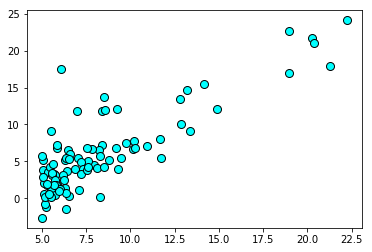

In [6]:
df_ar = np.loadtxt('data.txt', delimiter = ',')
plt.plot(df_ar[:,0], df_ar[:,1], 'go', ms=8, mec='k', color = 'cyan')
plt.show()

In [41]:
X = np.stack([np.ones(df_ar[:,0].size), df_ar[:,0]], axis=1)
y = df_ar[:,1]
theta = np.zeros(2)
iterations = 1500
alpha = 0.01

In [42]:
def computeCost(X, y, theta):
    m = y.size
    
    J = 0
    h = np.dot(X,theta)
    l = [i**2 for i in h-y]
    J = (1/m*2)*sum(l)
    
    return J

In [43]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = y.shape[0]
    theta = theta.copy()
    
    for i in range(iterations):
        h = np.dot(X,theta)
        theta = theta-alpha*(1.0/m)*np.dot(X.T,h-y)
        
    return theta

In [44]:
theta = gradientDescent(X ,y, theta, alpha, iterations)
theta

array([-3.63029144,  1.16636235])

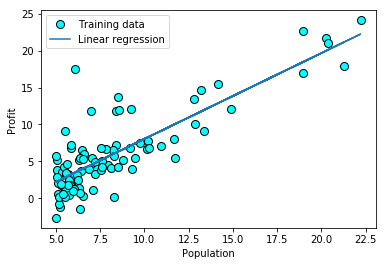

In [45]:
plt.plot(X[:,1], y, 'go', ms=8, mec='k', color = 'cyan')
plt.plot(X[:,1], np.dot(X, theta))
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend(['Training data', 'Linear regression']);
plt.show()

In [61]:
pred1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict profit =',pred1*10000)

pred2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict profit =',pred2*10000)

pred = np.array([[pred1*10000],[pred2*10000]])

For population = 35,000, we predict profit = 4519.7678677017675
For population = 70,000, we predict profit = 45342.45012944714


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [63]:
X_new = df.iloc[:, :-1].values
y_new = df.iloc[:, 1].values

In [64]:
xTrain, xTest, yTrain, yTest = train_test_split(X_new, y_new, test_size = 1/3, random_state = 0)



In [65]:
linearRegressor = LinearRegression()

In [66]:
linearRegressor.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
yPrediction = linearRegressor.predict(xTest)

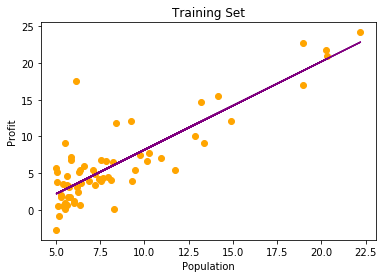

In [72]:
plt.scatter(xTrain, yTrain, color = 'orange')
plt.plot(xTrain, linearRegressor.predict(xTrain), color = 'purple')
plt.title('Training Set')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

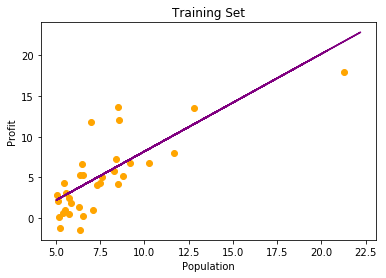

In [73]:
plt.scatter(xTest, yTest, color = 'orange')
plt.plot(xTrain, linearRegressor.predict(xTrain), color = 'purple')
plt.title('Training Set')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

In [70]:
X_given = np.array([[3.5],[7]])
y_pred2 = linearRegressor.predict(X_given)*10000

In [71]:
df2 = pd.DataFrame({'Using Scikit_Learn': y_pred2.flatten(), 'Self Implemented': pred.flatten()})
df2.rename(index={0:'35,000',1:'70,000'},inplace=True)
df2

,Using Scikit_Learn,Self Implemented
"35,000",3928.005332,4519.767868
"70,000",45885.387070,45342.450129
